In [34]:
%pip install -q numpy
%pip install -q matplotlib
%pip install -q Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import io
import os

In [2]:
WIDTH, HEIGHT = 98, 98

In [20]:
current_path = os.getcwd()
images_path = current_path+'/static_images/sample_images'
print(images_path)

/home/seba/Code/SistEmb/proyecto/fill_water_system/static_images/sample_images


In [106]:
images = []
for file in os.listdir(images_path):
    if file.startswith("image") or file.startswith("user"):
        images.append(file)

print("All images ")
for indx, image in enumerate(images):
    print(indx, image)

All images 
0 image7
1 image8
2 image9
3 image0
4 image1
5 image2
6 image3
7 image4
8 image5
9 image6


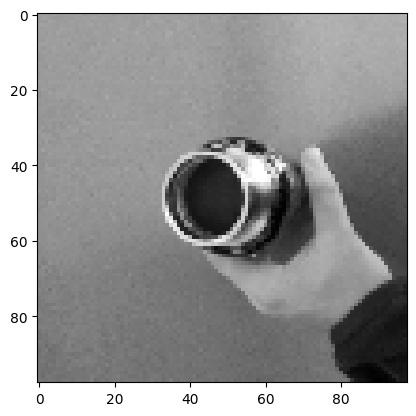

int8


In [108]:
while True:
    try:
        image_indx = int(input("Enter the index of the image: "))
        if image_indx < 0 or image_indx >= len(images):
            print("Please enter a valid index")
            continue
        break
    except:
        print("Please enter a valid index")

file_path = images_path+'/'+images[image_indx]

with open(file_path, 'rb') as file:
    file_bytes = file.read()
    image_data_one_dimension = np.frombuffer(file_bytes, dtype=np.int8)
    image_data = image_data_one_dimension.reshape((HEIGHT, WIDTH))
    plt.imshow(image_data, cmap='gray')  # Use grayscale color map
    # plt.axis('off')  # Hide axis labels and ticks
    plt.show()
    print(image_data.dtype)
        

In [34]:
def get_image(values):
    image = np.zeros((WIDTH,HEIGHT))
    d=0
    for y in range(0,HEIGHT-1):
        for x in range(0,WIDTH-1):
            image[y,x] = values[y*WIDTH+x]
    return image

In [110]:
dec_img = np.array([
33, 34, 33, 32, 36, 31, 33, 34, 34, 33, 36, 37, 31, 32, 35, 33, 39, 35, 36, 36, 29, 36, 35, 35, 35, 35, 37, 40, 35, 38, 34, 38, 38, 37, 36, 35, 38, 36, 37, 36, 31, 31, 36, 33, 33, 33, 35, 34, 36, 30, 38, 33, 29, 30, 28, 28, 33, 30, 29, 35, 36, 33, 38, 40, 40, 41, 44, 47, 49, 47, 52, 54, 53, 53, 53, 52, 52, 49, 52, 51, 52, 53, 53, 52, 51, 53, 52, 53, 49, 53, 54, 52, 52, 49, 48, 49, 53, 54, 30, 37, 36, 32, 30, 29, 29, 33, 33, 32, 36, 33, 37, 35, 37, 39, 34, 35, 35, 34, 34, 37, 36, 33, 36, 33, 35, 34, 31, 34, 36, 40, 36, 34, 36, 37, 37, 35, 35, 40, 35, 36, 41, 34, 34, 29, 39, 35, 32, 36, 32, 28, 26, 30, 27, 27, 28, 31, 31, 38, 41, 41, 41, 38, 41, 48, 46, 47, 44, 50, 50, 50, 52, 51, 51, 53, 49, 53, 53, 52, 52, 51, 51, 49, 45, 49, 49, 51, 47, 51, 49, 50, 50, 49, 50, 50, 51, 50, 33, 31, 31, 40, 36, 32, 33, 32, 35, 38, 33, 35, 34, 38, 33, 33, 34, 33, 34, 33, 34, 37, 37, 36, 38, 32, 34, 36, 31, 42, 37, 39, 40, 40, 30, 33, 41, 43, 38, 36, 38, 36, 37, 31, 31, 34, 37, 39, 35, 35, 27, 30, 27, 32, 37, 36, 31, 32, 37, 37, 38, 39, 39, 43, 38, 41, 44, 43, 47, 47, 56, 45, 49, 53, 55, 52, 54, 53, 50, 53, 48, 51, 48, 49, 47, 46, 45, 48, 49, 51, 49, 50, 51, 47, 49, 47, 51, 53, 37, 39, 37, 36, 33, 32, 35, 34, 32, 34, 33, 36, 35, 37, 41, 32, 38, 35, 33, 40, 37, 36, 38, 38, 36, 33, 32, 37, 36, 40, 35, 32, 37, 36, 36, 37, 34, 41, 40, 41, 35, 34, 39, 32, 33, 33, 32, 34, 32, 31, 28, 29, 31, 29, 32, 30, 28, 32, 27, 36, 33, 41, 39, 42, 41, 39, 44, 37, 49, 51, 52, 49, 47, 50, 51, 51, 49, 53, 51, 54, 54, 49, 50, 51, 50, 44, 46, 47, 52, 45, 49, 50, 47, 51, 45, 46, 45, 48, 35, 33, 35, 34, 33, 33, 40, 36, 36, 36, 30, 35, 34, 35, 34, 34, 34, 36, 33, 35, 35, 37, 42, 38, 34, 33, 37, 38, 36, 33, 36, 36, 34, 36, 39, 34, 34, 42, 38, 37, 32, 36, 39, 37, 34, 33, 30, 34, 35, 31, 23, 30, 30, 31, 24, 30, 28, 32, 39, 35, 36, 38, 38, 43, 40, 40, 40, 45, 47, 48, 47, 49, 51, 51, 53, 54, 49, 53, 51, 52, 54, 50, 53, 52, 46, 44, 48, 51, 51, 50, 51, 49, 47, 48, 52, 49, 52, 47, 33, 35, 31, 36, 32, 40, 33, 35, 32, 35, 31, 33, 33, 30, 33, 40, 37, 34, 33, 33, 37, 34, 36, 38, 36, 36, 43, 35, 33, 38, 34, 38, 38, 33, 42, 45, 35, 35, 35, 37, 39, 30, 35, 36, 35, 30, 36, 33, 28, 30, 28, 25, 27, 27, 27, 33, 33, 30, 30, 36, 38, 42, 41, 42, 37, 40, 38, 42, 42, 44, 47, 49, 51, 52, 50, 55, 53, 53, 52, 53, 53, 52, 50, 50, 49, 50, 47, 48, 48, 46, 45, 48, 46, 49, 47, 49, 46, 48, 35, 33, 33, 35, 32, 33, 32, 31, 34, 32, 37, 30, 37, 32, 34, 33, 35, 33, 35, 35, 33, 38, 41, 36, 32, 36, 37, 39, 37, 34, 38, 36, 37, 33, 43, 38, 35, 33, 39, 34, 38, 42, 32, 35, 36, 36, 35, 33, 34, 31, 31, 26, 29, 29, 33, 29, 28, 33, 33, 37, 32, 37, 37, 34, 41, 40, 44, 42, 45, 46, 46, 51, 47, 49, 49, 54, 51, 51, 51, 54, 49, 50, 50, 48, 46, 48, 54, 50, 48, 47, 46, 45, 48, 45, 46, 52, 45, 50, 31, 31, 36, 35, 34, 36, 34, 35, 37, 31, 32, 34, 33, 36, 31, 33, 34, 33, 35, 36, 42, 29, 36, 38, 35, 37, 37, 38, 41, 34, 37, 38, 38, 37, 40, 37, 35, 38, 38, 35, 34, 38, 34, 34, 33, 33, 31, 33, 34, 34, 30, 24, 27, 33, 26, 34, 31, 31, 31, 33, 40, 37, 34, 39, 43, 41, 36, 42, 43, 43, 47, 52, 47, 48, 49, 55, 47, 49, 51, 52, 51, 53, 51, 48, 52, 52, 47, 50, 44, 50, 49, 47, 50, 46, 47, 52, 51, 47, 36, 38, 36, 33, 35, 34, 33, 37, 27, 37, 33, 32, 30, 28, 30, 27, 40, 31, 34, 37, 37, 37, 38, 33, 34, 34, 37, 34, 39, 35, 34, 31, 37, 38, 37, 39, 34, 30, 35, 36, 35, 34, 41, 35, 34, 34, 36, 36, 37, 30, 31, 29, 28, 28, 29, 28, 31, 34, 34, 32, 36, 40, 35, 40, 39, 43, 38, 42, 44, 42, 48, 48, 47, 45, 52, 49, 53, 53, 50, 56, 49, 47, 52, 42, 47, 50, 47, 46, 50, 47, 52, 50, 46, 47, 47, 48, 48, 52, 35, 28, 32, 36, 38, 33, 32, 34, 37, 34, 34, 29, 31, 28, 39, 35, 38, 36, 39, 34, 37, 37, 37, 36, 34, 36, 34, 34, 35, 39, 32, 32, 32, 31, 35, 37, 32, 32, 37, 31, 36, 39, 34, 37, 33, 28, 29, 28, 25, 33, 27, 30, 24, 27, 25, 29, 28, 30, 32, 30, 37, 32, 33, 40, 41, 41, 40, 46, 49, 46, 47, 47, 46, 55, 42, 50, 50, 49, 51, 48, 48, 47, 46, 49, 46, 48, 53, 48, 47, 44, 47, 46, 45, 46, 46, 44, 49, 48, 31, 35, 34, 30, 36, 35, 34, 33, 33, 32, 36, 32, 30, 34, 39, 37, 30, 33, 35, 34, 36, 37, 34, 31, 37, 35, 34, 36, 35, 33, 31, 33, 36, 35, 35, 37, 40, 36, 38, 41, 37, 38, 35, 30, 36, 32, 33, 30, 31, 30, 30, 30, 25, 33, 28, 29, 26, 31, 31, 31, 30, 36, 38, 42, 39, 37, 44, 43, 47, 51, 48, 45, 48, 47, 49, 51, 51, 50, 48, 48, 48, 48, 46, 42, 47, 47, 48, 49, 49, 52, 47, 44, 47, 42, 43, 50, 44, 44, 29, 30, 33, 35, 34, 29, 33, 32, 31, 34, 29, 34, 33, 34, 32, 37, 32, 37, 39, 35, 34, 34, 37, 35, 33, 32, 37, 33, 35, 34, 28, 33, 35, 34, 31, 37, 37, 37, 40, 40, 36, 38, 33, 35, 36, 35, 30, 34, 31, 34, 24, 26, 28, 31, 25, 24, 23, 31, 27, 31, 33, 32, 37, 42, 43, 41, 41, 41, 44, 47, 43, 49, 46, 49, 48, 51, 46, 50, 48, 48, 47, 40, 44, 47, 49, 51, 46, 47, 45, 45, 47, 47, 46, 44, 45, 44, 44, 44, 27, 30, 34, 32, 32, 34, 36, 31, 34, 30, 30, 37, 34, 32, 32, 29, 34, 41, 34, 35, 31, 37, 38, 28, 39, 31, 35, 34, 39, 27, 38, 39, 35, 30, 36, 37, 40, 31, 33, 41, 35, 38, 39, 35, 37, 33, 36, 28, 31, 28, 27, 28, 28, 23, 25, 28, 25, 24, 27, 30, 32, 33, 35, 40, 41, 34, 44, 43, 39, 39, 46, 47, 46, 45, 45, 55, 48, 46, 50, 50, 47, 49, 51, 47, 47, 45, 47, 47, 46, 44, 42, 45, 45, 43, 43, 44, 46, 45, 33, 30, 32, 33, 32, 32, 31, 33, 33, 28, 31, 31, 30, 35, 33, 37, 39, 37, 32, 33, 37, 32, 36, 33, 36, 34, 39, 35, 36, 36, 37, 34, 33, 27, 37, 38, 37, 40, 34, 36, 40, 35, 31, 30, 36, 32, 29, 30, 33, 22, 35, 29, 31, 27, 22, 23, 26, 27, 27, 24, 26, 36, 35, 36, 40, 37, 38, 41, 43, 41, 50, 46, 40, 45, 43, 48, 52, 47, 48, 49, 47, 50, 43, 44, 45, 40, 47, 43, 45, 48, 46, 45, 43, 45, 47, 44, 47, 40, 29, 30, 27, 38, 29, 31, 34, 37, 34, 36, 32, 24, 37, 34, 37, 28, 33, 34, 30, 33, 32, 32, 35, 29, 33, 32, 31, 33, 30, 34, 34, 34, 33, 34, 35, 37, 32, 33, 35, 34, 41, 40, 36, 25, 33, 34, 37, 29, 33, 28, 29, 26, 28, 22, 21, 22, 26, 25, 33, 30, 32, 34, 31, 39, 39, 38, 41, 36, 46, 40, 46, 42, 45, 47, 42, 46, 46, 47, 46, 45, 45, 48, 46, 45, 41, 36, 42, 48, 50, 45, 45, 46, 45, 42, 44, 44, 44, 43, 32, 32, 33, 31, 28, 32, 33, 31, 33, 37, 36, 29, 32, 34, 37, 33, 36, 35, 34, 34, 34, 33, 34, 33, 30, 34, 36, 30, 35, 34, 35, 38, 33, 34, 34, 32, 36, 32, 32, 35, 37, 36, 34, 33, 36, 34, 32, 32, 32, 32, 20, 25, 27, 27, 27, 22, 24, 26, 27, 31, 33, 30, 33, 34, 32, 42, 40, 41, 37, 43, 43, 44, 43, 50, 43, 44, 53, 50, 45, 43, 44, 45, 46, 46, 47, 38, 44, 41, 46, 47, 43, 42, 46, 44, 44, 41, 43, 42, 28, 33, 34, 34, 33, 31, 30, 32, 37, 29, 32, 39, 35, 33, 34, 36, 35, 33, 33, 32, 32, 35, 30, 31, 33, 38, 33, 36, 32, 34, 32, 36, 35, 33, 36, 32, 34, 32, 34, 40, 32, 38, 34, 35, 33, 35, 32, 33, 33, 26, 25, 24, 33, 28, 25, 26, 26, 28, 30, 29, 31, 34, 36, 39, 33, 39, 39, 40, 39, 36, 40, 41, 47, 43, 46, 47, 49, 47, 48, 44, 41, 40, 43, 42, 44, 46, 40, 39, 42, 45, 44, 42, 44, 45, 39, 40, 40, 42, 31, 31, 32, 32, 32, 32, 31, 31, 29, 32, 34, 27, 33, 30, 34, 33, 35, 38, 36, 37, 31, 32, 39, 35, 32, 27, 38, 32, 33, 31, 42, 34, 33, 35, 34, 34, 33, 32, 35, 36, 31, 31, 35, 37, 33, 34, 33, 30, 32, 31, 27, 27, 27, 28, 28, 27, 30, 26, 29, 33, 29, 32, 33, 31, 36, 36, 33, 39, 50, 43, 41, 45, 47, 49, 45, 46, 46, 49, 46, 45, 41, 41, 46, 42, 42, 39, 40, 41, 41, 40, 42, 40, 43, 43, 42, 42, 43, 41, 34, 32, 28, 34, 35, 34, 32, 35, 33, 34, 34, 33, 34, 34, 38, 32, 33, 31, 36, 32, 34, 36, 34, 35, 33, 38, 31, 36, 36, 32, 34, 39, 37, 34, 39, 36, 36, 35, 39, 35, 34, 34, 37, 35, 32, 34, 37, 34, 29, 34, 23, 26, 26, 25, 26, 23, 24, 20, 26, 28, 25, 32, 37, 35, 36, 36, 40, 39, 37, 41, 40, 47, 45, 47, 48, 46, 45, 46, 44, 43, 44, 40, 41, 40, 44, 40, 41, 41, 43, 39, 44, 41, 38, 43, 41, 41, 41, 36, 29, 32, 31, 33, 29, 29, 32, 30, 36, 31, 37, 33, 29, 34, 33, 33, 30, 31, 31, 33, 31, 33, 33, 34, 35, 34, 34, 32, 35, 30, 34, 31, 32, 34, 31, 33, 34, 33, 31, 34, 34, 30, 32, 35, 35, 31, 32, 27, 26, 28, 36, 26, 28, 29, 19, 22, 30, 25, 24, 27, 31, 32, 33, 33, 34, 37, 37, 37, 43, 38, 42, 44, 49, 48, 46, 47, 45, 44, 41, 42, 42, 45, 42, 40, 41, 37, 40, 41, 40, 38, 40, 39, 42, 40, 39, 39, 39, 39, 30, 34, 33, 28, 27, 32, 29, 33, 36, 33, 33, 34, 32, 34, 31, 39, 32, 32, 36, 33, 33, 31, 33, 33, 32, 34, 30, 35, 32, 33, 34, 31, 34, 35, 35, 28, 37, 32, 30, 32, 35, 28, 33, 30, 28, 33, 35, 32, 28, 29, 26, 25, 32, 20, 24, 31, 28, 28, 23, 26, 29, 33, 37, 34, 35, 40, 38, 40, 37, 41, 42, 43, 43, 44, 46, 43, 44, 51, 42, 40, 45, 42, 38, 41, 40, 39, 41, 37, 39, 39, 37, 41, 36, 43, 38, 36, 38, 33, 22, 30, 30, 36, 30, 35, 37, 35, 33, 32, 35, 33, 34, 33, 33, 32, 30, 35, 34, 34, 31, 29, 33, 35, 34, 35, 32, 33, 33, 34, 34, 35, 41, 36, 36, 33, 32, 29, 35, 40, 30, 34, 31, 34, 29, 29, 29, 27, 34, 23, 23, 26, 22, 25, 22, 20, 24, 19, 24, 23, 27, 27, 28, 37, 33, 35, 38, 33, 41, 43, 41, 46, 44, 43, 45, 43, 43, 43, 43, 42, 43, 46, 44, 40, 40, 38, 38, 38, 38, 36, 38, 36, 36, 36, 34, 34, 31, 34, 23, 29, 29, 31, 31, 35, 34, 35, 29, 34, 36, 36, 33, 33, 34, 31, 30, 33, 43, 33, 34, 35, 30, 35, 34, 30, 30, 33, 29, 34, 34, 31, 32, 31, 33, 30, 28, 29, 32, 34, 32, 31, 35, 31, 32, 30, 34, 33, 29, 23, 26, 24, 31, 23, 22, 23, 22, 24, 30, 26, 29, 29, 29, 32, 31, 34, 36, 36, 37, 40, 38, 40, 44, 44, 48, 41, 42, 45, 43, 42, 39, 36, 41, 37, 42, 41, 39, 38, 35, 34, 36, 33, 39, 36, 36, 30, 28, 31, 29, 29, 28, 29, 29, 30, 25, 31, 30, 27, 31, 29, 38, 33, 36, 35, 31, 31, 34, 32, 31, 34, 34, 36, 34, 32, 33, 33, 32, 32, 36, 31, 34, 33, 29, 31, 33, 32, 37, 38, 38, 33, 25, 35, 30, 29, 31, 27, 29, 26, 27, 24, 25, 18, 20, 21, 19, 25, 25, 30, 27, 28, 31, 29, 33, 37, 37, 35, 39, 38, 41, 41, 43, 40, 44, 39, 41, 42, 37, 43, 39, 44, 38, 35, 37, 37, 36, 36, 38, 34, 34, 32, 34, 35, 30, 30, 26, 24, 25, 29, 29, 33, 30, 29, 33, 29, 24, 31, 31, 31, 32, 34, 34, 33, 35, 34, 32, 37, 34, 36, 36, 36, 33, 28, 32, 30, 32, 29, 30, 30, 33, 29, 29, 34, 31, 33, 32, 32, 25, 37, 31, 37, 32, 23, 32, 32, 28, 26, 27, 25, 22, 22, 28, 22, 26, 26, 25, 22, 30, 26, 27, 31, 38, 35, 38, 38, 38, 38, 39, 38, 35, 43, 42, 43, 43, 41, 41, 40, 40, 44, 38, 37, 38, 36, 32, 31, 32, 30, 32, 31, 27, 33, 26, 27, 21, 21, 29, 31, 29, 27, 27, 30, 29, 26, 27, 32, 28, 26, 33, 34, 25, 32, 31, 33, 30, 33, 36, 36, 35, 33, 32, 36, 32, 35, 33, 31, 30, 31, 30, 30, 31, 27, 33, 32, 30, 30, 29, 40, 36, 30, 31, 27, 36, 29, 28, 28, 17, 22, 27, 26, 24, 23, 26, 25, 22, 21, 23, 29, 34, 30, 35, 35, 40, 36, 35, 38, 41, 41, 44, 45, 42, 41, 43, 44, 40, 38, 42, 40, 32, 37, 35, 31, 32, 30, 32, 32, 25, 25, 19, 19, 21, 19, 14, 7, 28, 29, 27, 26, 25, 32, 27, 29, 29, 28, 32, 34, 28, 28, 35, 34, 33, 34, 32, 32, 35, 34, 34, 36, 32, 29, 33, 34, 30, 28, 30, 27, 35, 34, 28, 32, 32, 30, 34, 32, 33, 29, 34, 36, 36, 30, 24, 28, 25, 22, 22, 21, 25, 25, 24, 26, 24, 21, 25, 22, 23, 31, 29, 38, 30, 34, 33, 36, 30, 38, 40, 36, 35, 43, 42, 41, 42, 43, 34, 39, 37, 33, 33, 35, 31, 30, 28, 27, 25, 26, 24, 18, 18, 11, 14, 11, 1, 7, 28, 27, 27, 25, 27, 28, 29, 25, 30, 28, 38, 23, 28, 33, 32, 29, 35, 28, 41, 30, 40, 31, 34, 31, 31, 33, 32, 33, 32, 32, 32, 36, 32, 36, 30, 28, 30, 32, 31, 31, 34, 31, 32, 32, 26, 23, 28, 29, 26, 26, 24, 21, 20, 24, 24, 21, 22, 21, 25, 25, 27, 29, 30, 27, 34, 34, 34, 32, 32, 37, 35, 37, 38, 35, 40, 40, 39, 34, 37, 37, 35, 32, 31, 37, 29, 24, 21, 25, 19, 15, 17, 15, 14, 6, 3, 1, -2, 1, 26, 29, 28, 28, 31, 29, 33, 29, 29, 31, 28, 36, 33, 24, 30, 33, 31, 30, 30, 35, 31, 30, 32, 29, 30, 28, 30, 34, 33, 31, 31, 31, 34, 30, 32, 30, 29, 30, 31, 33, 31, 31, 32, 31, 29, 29, 29, 28, 25, 25, 26, 21, 24, 19, 22, 23, 19, 20, 22, 26, 26, 28, 23, 28, 28, 34, 35, 33, 29, 31, 36, 34, 37, 36, 42, 37, 40, 38, 38, 35, 34, 31, 26, 20, 28, 20, 17, 16, 7, 10, 9, 2, 7, -3, 0, 4, -3, 1, 29, 26, 29, 28, 26, 28, 22, 30, 27, 29, 27, 33, 37, 38, 32, 37, 35, 31, 33, 34, 34, 35, 37, 33, 38, 37, 37, 36, 33, 32, 31, 34, 32, 32, 27, 35, 29, 33, 34, 34, 40, 35, 35, 29, 33, 27, 30, 30, 27, 25, 29, 28, 27, 16, 18, 20, 22, 21, 20, 25, 27, 24, 28, 29, 31, 35, 33, 33, 34, 34, 36, 33, 32, 38, 35, 35, 38, 39, 36, 33, 29, 22, 16, 22, 20, 13, 18, 11, 5, 3, 5, -3, 0, -8, -2, -10, -1, -4, 27, 32, 25, 30, 24, 28, 24, 25, 37, 31, 32, 28, 29, 30, 35, 31, 32, 32, 34, 36, 31, 33, 28, 34, 32, 33, 35, 31, 34, 32, 29, 31, 33, 30, 26, 39, 32, 31, 31, 30, 32, 34, 36, 36, 26, 28, 30, 31, 24, 26, 21, 20, 22, 22, 21, 25, 21, 21, 24, 25, 24, 28, 24, 18, 31, 35, 33, 31, 31, 34, 36, 32, 34, 35, 29, 35, 35, 31, 27, 24, 20, 18, 16, 17, 9, 14, 13, 9, 2, -5, 5, -4, -6, -4, -9, -11, -8, -11, 33, 25, 26, 25, 27, 30, 29, 30, 30, 35, 36, 24, 35, 31, 32, 30, 32, 31, 31, 34, 32, 32, 38, 36, 33, 32, 32, 34, 32, 33, 35, 36, 34, 33, 33, 30, 32, 33, 35, 33, 30, 30, 33, 30, 33, 29, 26, 27, 26, 29, 16, 25, 20, 19, 18, 15, 18, 22, 24, 26, 27, 25, 29, 24, 31, 31, 32, 37, 32, 34, 35, 36, 32, 33, 29, 33, 26, 21, 26, 19, 15, 13, 13, 4, 7, 2, 1, -5, 4, 0, -6, -5, -3, -8, -6, -8, -13, -10, 29, 34, 31, 31, 23, 25, 32, 32, 33, 30, 28, 30, 28, 26, 30, 34, 32, 31, 32, 34, 32, 34, 36, 33, 36, 32, 37, 34, 37, 39, 34, 34, 33, 36, 32, 33, 34, 30, 28, 31, 26, 27, 33, 31, 32, 29, 27, 28, 25, 29, 24, 18, 21, 20, 19, 22, 21, 22, 23, 24, 23, 21, 25, 29, 31, 30, 29, 28, 30, 32, 32, 30, 33, 31, 30, 30, 28, 24, 14, 20, 11, 9, 9, 4, 2, 0, -3, -6, -7, -12, -10, -10, -12, -10, -5, -12, -17, -12, 27, 29, 34, 31, 30, 24, 28, 30, 26, 27, 28, 28, 30, 32, 27, 33, 32, 28, 31, 23, 33, 34, 34, 32, 32, 33, 31, 32, 32, 36, 33, 30, 33, 32, 30, 33, 34, 30, 30, 34, 31, 31, 34, 33, 30, 29, 29, 16, 13, 1, -38, -51, -59, -64, -52, -23, -1, 23, 20, 19, 20, 23, 28, 27, 26, 29, 28, 26, 26, 27, 29, 29, 27, 29, 26, 27, 21, 17, 12, 5, 3, 3, 5, -4, -2, -7, -9, -9, -11, -19, -14, -15, -16, -17, -14, -18, -21, -16, 30, 26, 34, 24, 27, 27, 27, 32, 28, 30, 30, 29, 32, 30, 33, 34, 35, 29, 31, 33, 33, 34, 32, 34, 34, 32, 31, 33, 34, 30, 26, 31, 27, 29, 31, 25, 33, 31, 31, 30, 33, 29, 31, 29, 29, -8, -29, -25, -47, 4, -4, -76, -73, 16, 27, -60, -69, -49, 2, 11, 24, 27, 28, 28, 22, 26, 25, 24, 24, 26, 31, 29, 23, 27, 24, 7, 11, 3, -2, -5, -3, -4, -2, -7, -14, -4, -15, -9, -13, -15, -21, -11, -16, -17, -18, -17, -23, -14, 25, 27, 30, 31, 27, 30, 29, 30, 34, 27, 27, 30, 31, 33, 30, 25, 27, 31, 28, 32, 29, 29, 33, 32, 28, 31, 29, 30, 34, 33, 30, 31, 29, 29, 28, 36, 30, 27, 33, 32, 31, 33, 27, 20, -42, -76, 26, 70, 57, -28, -22, 32, 6, 5, 58, -54, -85, -93, -76, -51, -3, 34, 20, 26, 21, 23, 25, 22, 20, 25, 26, 27, 38, 45, 9, 4, 0, -4, -2, -3, -10, -14, -7, -11, -9, -14, -9, -14, -14, -18, -13, -22, -19, -21, -22, -21, -20, -17, 28, 36, 28, 29, 30, 32, 30, 32, 31, 29, 29, 33, 28, 33, 37, 30, 29, 29, 29, 33, 30, 30, 30, 25, 35, 31, 28, 30, 30, 24, 30, 33, 27, 33, 30, 29, 31, 34, 31, 30, 35, 37, 24, 9, 0, -7, -59, -54, -54, -15, 75, 97, 102, 95, 69, -78, -83, -73, -91, -84, -55, 30, 43, 12, 18, 23, 23, 25, 25, 16, 23, 61, 80, 95, 94, -5, -3, -7, -7, -8, -9, -18, -20, -18, -13, -17, -13, -15, -18, -22, -24, -21, -17, -19, -20, -21, -19, -18, 28, 23, 25, 33, 28, 28, 30, 29, 27, 29, 28, 29, 31, 27, 28, 31, 29, 28, 27, 31, 33, 31, 34, 30, 31, 31, 32, 29, 32, 30, 30, 34, 31, 34, 32, 34, 30, 29, 34, 43, 78, 82, 80, 77, 90, 96, 94, 88, 71, 33, 64, 81, 93, 100, 89, 70, 31, -29, 15, -43, 13, 7, -13, 13, 6, 14, 17, 17, 21, 16, 49, 63, 80, 88, 103, 35, -8, -10, -12, -12, -12, -12, -15, -16, -15, -12, -22, -17, -27, -21, -23, -25, -22, -21, -27, -21, -25, -20, 27, 27, 28, 29, 28, 30, 29, 30, 30, 33, 29, 28, 30, 29, 24, 26, 32, 36, 30, 32, 35, 29, 30, 31, 30, 31, 29, 35, 29, 34, 26, 32, 31, 28, 29, 29, 29, 29, 76, 85, 76, 12, -26, -24, -26, -41, -34, 30, 80, 93, 83, 67, 65, 68, 75, 84, 101, 95, 61, 71, 46, 22, 82, 4, 54, 1, 8, 10, 15, 10, 47, 51, 69, 76, 86, 66, -15, -17, -11, -18, -14, -13, -18, -18, -16, -23, -19, -18, -22, -22, -23, -21, -24, -27, -23, -26, -26, -26, 25, 26, 27, 27, 26, 25, 28, 24, 31, 30, 27, 24, 30, 30, 29, 28, 25, 26, 25, 30, 27, 26, 31, 29, 24, 27, 33, 30, 31, 30, 29, 32, 29, 28, 29, 29, 28, 75, 76, 1, -62, -15, -5, -17, -68, -91, -90, -86, -83, 30, 98, 94, 45, 47, 63, 81, 114, 126, 126, 101, 58, -44, 14, 97, 71, 2, -7, -6, -10, 4, 46, 48, 54, 61, 79, 79, -17, -10, -13, -18, -17, -17, -18, -26, -19, -20, -20, -30, -26, -29, -25, -25, -28, -27, -24, -26, -27, -26, 26, 22, 32, 26, 23, 28, 29, 32, 30, 26, 25, 25, 27, 31, 26, 24, 31, 27, 27, 27, 25, 30, 29, 29, 31, 31, 27, 25, 34, 32, 35, 31, 30, 31, 29, 32, 70, 67, -51, -47, -26, -49, -59, -92, -95, -91, -88, -87, -87, -86, -50, 94, 105, 22, 63, 78, 110, 126, 126, 126, 79, 94, -10, 110, 121, 109, 23, -27, -38, -24, 35, 64, 55, 57, 69, 84, 56, -17, -12, -20, -18, -21, -22, -22, -20, -20, -20, -23, -23, -23, -29, -27, -30, -25, -29, -32, -26, -27, 22, 25, 33, 34, 31, 26, 30, 27, 30, 25, 35, 29, 28, 25, 31, 33, 29, 29, 29, 31, 34, 31, 27, 39, 32, 30, 33, 19, 28, 32, 33, 31, 31, 27, 30, 65, 72, -54, -44, -24, -61, -70, -91, -95, -94, -91, -88, -88, -84, -83, -79, -60, 93, 100, 35, 94, 120, 126, 126, 126, 90, 88, 98, 52, 126, 36, 23, -18, -56, -75, 7, 52, 66, 62, 64, 75, 78, -1, -15, -17, -21, -28, -26, -22, -24, -26, -23, -31, -24, -29, -24, -23, -28, -31, -38, -26, -31, -28, 27, 25, 26, 29, 28, 30, 29, 27, 25, 30, 28, 29, 33, 27, 28, 26, 28, 30, 31, 29, 31, 35, 30, 28, 27, 32, 32, 32, 26, 33, 36, 35, 29, 26, 44, 76, -9, -64, -19, -54, -64, -87, -97, -92, -91, -90, -87, -83, -80, -77, -76, -76, 3, 117, 110, 88, 113, 126, 126, 126, 126, 18, 104, 31, 40, -54, -1, 0, -36, -71, -18, 41, 46, 63, 68, 75, 79, 75, -30, -20, -21, -23, -23, -26, -26, -25, -30, -31, -26, -27, -27, -29, -35, -34, -29, -28, -30, -33, 24, 27, 29, 28, 26, 24, 31, 28, 32, 21, 25, 31, 26, 31, 29, 29, 28, 32, 28, 32, 28, 30, 25, 31, 27, 28, 30, 35, 28, 29, 33, 28, 35, 29, 70, 61, -87, -22, -51, -58, -76, -95, -93, -89, -91, -86, -82, -80, -78, -74, -71, -75, -75, 69, 126, 112, 110, 126, 126, 126, 126, 117, 84, 88, -64, -83, 11, 11, -26, -48, -46, 32, 45, 60, 64, 71, 75, 78, 47, -24, -27, -23, -27, -29, -31, -32, -29, -31, -32, -30, -24, -33, -36, -29, -31, -32, -35, -32, 25, 24, 28, 25, 29, 30, 31, 28, 28, 26, 28, 25, 24, 28, 32, 28, 29, 28, 31, 30, 32, 28, 29, 28, 31, 28, 30, 29, 30, 26, 30, 31, 32, 36, 79, -35, -54, -51, -52, -60, -93, -93, -90, -87, -85, -81, -80, -78, -75, -76, -74, -75, -80, -60, 117, 126, 125, 119, 126, 126, 126, 117, 17, 33, -84, -88, -50, 38, -24, -32, -65, 28, 46, 48, 58, 59, 66, 69, 71, -24, -24, -27, -25, -31, -32, -29, -34, -29, -28, -35, -36, -33, -31, -31, -24, -30, -37, -34, 25, 24, 27, 25, 27, 25, 28, 28, 31, 29, 31, 25, 24, 30, 32, 27, 27, 27, 24, 28, 27, 28, 30, 25, 28, 29, 28, 29, 28, 29, 29, 33, 27, 61, 58, -80, -43, -59, -54, -63, -94, -90, -88, -86, -84, -80, -79, -80, -76, -73, -74, -76, -79, -75, 83, 98, 51, 71, 82, 102, 93, 89, 16, 4, -61, -85, -81, 2, -28, -29, -69, -10, 33, 29, 43, 43, 47, 60, 65, 42, -26, -31, -28, -28, -37, -35, -35, -33, -38, -35, -35, -30, -36, -35, -29, -32, -36, -36, 23, 24, 21, 25, 22, 29, 27, 23, 26, 25, 30, 26, 25, 27, 25, 26, 25, 26, 26, 21, 26, 32, 27, 28, 26, 31, 28, 25, 23, 28, 29, 28, 26, 78, 1, -77, -41, -41, -60, -79, -92, -90, -85, -83, -77, -78, -76, -76, -75, -74, -74, -77, -78, -74, 47, 97, -13, 0, 47, 72, 76, 63, 21, 0, -74, -88, -85, -24, -46, -46, -69, -49, 14, 19, 24, 26, 34, 42, 45, 59, -37, -31, -31, -32, -31, -35, -32, -35, -34, -36, -37, -35, -34, -38, -41, -38, -38, -34, 29, 22, 29, 26, 23, 28, 27, 26, 29, 26, 28, 27, 27, 21, 26, 29, 23, 31, 29, 28, 27, 27, 27, 28, 30, 29, 26, 29, 28, 26, 29, 27, 32, 75, -37, -72, -54, -24, -55, -85, -90, -90, -87, -83, -81, -75, -77, -76, -75, -71, -72, -73, -74, -75, -19, 90, -9, -27, 1, 26, 34, 9, -31, -61, -106, -103, -81, -60, -53, -56, -73, -65, -2, 8, 11, 22, 30, 30, 35, 56, -13, -36, -30, -34, -36, -35, -35, -34, -33, -35, -42, -38, -36, -38, -34, -35, -45, -37, 21, 25, 22, 27, 23, 25, 28, 29, 26, 24, 28, 25, 27, 27, 14, 32, 27, 29, 25, 26, 27, 27, 20, 27, 29, 24, 28, 26, 25, 30, 30, 29, 27, 74, -57, -67, -59, -21, -54, -88, -92, -89, -85, -82, -80, -76, -76, -74, -75, -75, -74, -74, -75, -75, -62, 83, -28, -54, -53, -29, -21, -35, -44, -64, -88, -107, -95, -48, -50, -63, -72, -81, -14, 4, 15, 27, 38, 40, 45, 62, 39, -44, -41, -44, -36, -39, -37, -35, -35, -43, -40, -36, -40, -42, -41, -37, -39, -36, 21, 20, 20, 22, 20, 29, 27, 27, 22, 28, 30, 29, 26, 25, 28, 25, 24, 29, 26, 28, 24, 26, 31, 26, 26, 28, 24, 27, 24, 26, 30, 24, 28, 77, -48, -53, -56, -10, -42, -88, -93, -87, -86, -83, -78, -75, -75, -76, -75, -70, -73, -75, -75, -73, -67, 85, -23, -60, -66, -47, -50, -52, -58, -73, -97, -106, -95, -50, -61, -65, -85, -90, -24, 8, 13, 26, 37, 41, 47, 58, 63, -46, -43, -45, -43, -41, -42, -40, -48, -40, -37, -40, -42, -39, -39, -40, -38, -38, 24, 26, 19, 32, 27, 29, 26, 24, 29, 22, 26, 26, 27, 25, 26, 24, 23, 24, 25, 23, 31, 24, 27, 27, 25, 25, 30, 27, 20, 28, 29, 29, 27, 81, -7, -58, -64, 9, -28, -75, -90, -88, -85, -81, -76, -76, -75, -76, -74, -72, -72, -77, -75, -75, -57, 85, -45, -71, -72, -52, -57, -55, -75, -82, -109, -111, -86, -60, -56, -66, -91, -88, -33, 10, 18, 26, 33, 43, 42, 53, 61, -33, -43, -41, -43, -48, -41, -47, -40, -42, -42, -43, -41, -43, -45, -37, -39, -38, 19, 19, 22, 25, 29, 23, 23, 24, 26, 27, 20, 27, 22, 25, 24, 24, 24, 23, 24, 20, 25, 22, 25, 26, 25, 27, 27, 25, 30, 24, 24, 23, 24, 83, 56, -62, -67, 20, -36, -63, -91, -89, -86, -83, -82, -77, -78, -77, -76, -76, -75, -75, -80, -77, -2, 88, -59, -82, -76, -58, -56, -60, -90, -90, -101, -110, -88, -65, -64, -75, -88, -81, -42, 13, 23, 25, 25, 30, 39, 46, 59, 25, -47, -42, -43, -47, -44, -46, -44, -42, -41, -45, -46, -40, -41, -39, -37, -44, 18, 25, 27, 25, 27, 26, 23, 24, 26, 26, 27, 24, 21, 19, 28, 28, 21, 26, 24, 25, 22, 24, 23, 24, 28, 25, 24, 25, 26, 24, 25, 23, 28, 74, 100, -63, -64, 23, -11, -41, -89, -93, -87, -84, -82, -82, -80, -81, -77, -77, -78, -78, -80, -79, 53, 79, -76, -76, -66, -45, -32, -40, -100, -106, -112, -110, -75, -59, -75, -85, -84, -81, -62, 9, 21, 26, 26, 27, 32, 41, 56, 55, -46, -43, -42, -43, -40, -45, -44, -48, -43, -48, -45, -45, -45, -38, -41, -37, 23, 22, 25, 23, 25, 28, 23, 28, 26, 22, 24, 22, 19, 23, 22, 23, 24, 23, 18, 28, 25, 18, 20, 25, 20, 24, 21, 23, 25, 21, 20, 23, 27, 32, 125, 4, -63, -41, 24, -37, -86, -94, -90, -85, -82, -85, -84, -83, -80, -78, -79, -79, -87, -85, 81, 56, -82, -63, -55, -17, -2, -33, -90, -109, -113, -99, -63, -66, -82, -74, -81, -79, -72, 4, 28, 30, 30, 30, 34, 35, 52, 63, -32, -46, -46, -45, -51, -47, -45, -45, -45, -44, -46, -46, -42, -44, -41, -40, 23, 25, 24, 26, 25, 18, 25, 24, 18, 25, 25, 21, 21, 22, 22, 25, 25, 20, 20, 21, 29, 23, 20, 24, 16, 20, 23, 25, 20, 22, 22, 20, 23, 23, 100, 101, -73, -82, 14, -46, -54, -92, -94, -92, -88, -87, -87, -84, -82, -80, -81, -80, -86, -36, 82, -40, -71, -35, -29, 22, 21, -57, -110, -111, -113, -75, -70, -75, -77, -76, -80, -79, -79, -11, 29, 33, 35, 29, 34, 34, 50, 59, 35, -43, -45, -46, -48, -48, -45, -48, -45, -46, -44, -49, -50, -41, -39, -40, 21, 23, 27, 23, 22, 23, 22, 18, 25, 23, 20, 22, 21, 23, 26, 21, 23, 25, 22, 20, 25, 22, 17, 20, 18, 19, 20, 21, 15, 17, 18, 14, 20, 21, 76, 125, 54, -83, -57, 18, -53, -70, -96, -93, -91, -90, -89, -87, -85, -83, -82, -83, -87, 69, 66, -77, -18, -14, 45, 69, 42, -74, -89, -112, -105, -72, -73, -83, -78, -80, -77, -76, -68, -19, 31, 31, 33, 33, 33, 37, 50, 61, 60, -51, -47, -48, -46, -48, -49, -48, -49, -48, -47, -47, -47, -50, -47, -40, 22, 23, 26, 18, 23, 23, 25, 25, 20, 17, 20, 27, 21, 22, 21, 18, 21, 22, 18, 20, 19, 21, 17, 18, 11, 20, 19, 18, 19, 17, 21, 15, 22, 19, 18, 88, 108, -64, -84, 10, 21, -59, -81, -95, -94, -92, -92, -90, -90, -88, -88, -84, 23, 86, -24, -40, -11, 32, 67, 71, 7, -66, -104, -111, -93, -67, -74, -77, -78, -79, -73, -67, -60, -22, 28, 33, 35, 35, 37, 36, 44, 58, 60, 8, -47, -45, -45, -48, -48, -49, -47, -50, -50, -44, -46, -49, -45, -44, 21, 22, 23, 22, 21, 19, 20, 20, 28, 21, 22, 19, 24, 22, 21, 19, 20, 20, 21, 21, 21, 17, 16, 16, 21, 17, 18, 16, 19, 15, 17, 16, 18, 17, 14, 15, 103, 97, -79, -83, -37, -42, -61, -72, -93, -94, -93, -92, -90, -92, -90, -13, 85, 40, -43, -16, 13, 53, 68, 27, -81, -76, -110, -110, -69, -69, -72, -76, -74, -75, -63, -61, -57, -29, 27, 32, 36, 41, 37, 37, 41, 50, 53, 50, -49, -49, -48, -48, -48, -48, -49, -48, -50, -48, -47, -45, -47, -48, 22, 20, 22, 24, 22, 19, 20, 25, 20, 21, 22, 19, 20, 20, 16, 15, 15, 21, 19, 15, 21, 16, 18, 19, 17, 18, 19, 18, 17, 17, 12, 11, 15, 14, 14, 17, 25, 105, 83, -74, -84, -64, -29, -37, -68, -57, -82, -95, -92, -81, 18, 84, 61, -18, -14, 8, 41, 55, 29, -69, -78, -77, -110, -97, -61, -65, -68, -73, -73, -70, -67, -57, -58, -25, 29, 40, 45, 46, 42, 42, 39, 40, 47, 50, 8, -47, -48, -54, -50, -48, -47, -51, -49, -51, -48, -49, -43, -49, 20, 20, 21, 27, 22, 22, 22, 24, 21, 21, 22, 14, 16, 20, 24, 19, 14, 18, 19, 18, 15, 19, 12, 18, 18, 11, 13, 14, 19, 10, 11, 15, 9, 13, 11, 9, 11, 21, 96, 95, 48, -80, -81, -48, -53, -49, -41, -42, 37, 100, 88, 52, -13, -3, 28, 44, 44, 11, -45, -53, -71, -101, -106, -76, -55, -68, -68, -70, -64, -67, -60, -61, -46, -6, 39, 45, 49, 51, 47, 39, 38, 42, 44, 48, 57, -10, -50, -51, -50, -49, -50, -49, -48, -48, -49, -49, -49, -49, 22, 20, 23, 24, 25, 24, 21, 18, 22, 21, 20, 15, 20, 20, 12, 17, 16, 18, 17, 15, 17, 18, 15, 14, 14, 14, 8, 17, 11, 11, 13, 14, 13, 9, 8, 10, 4, 7, 15, 67, 98, 96, 75, 51, 17, 34, 71, 110, 113, 98, 44, 18, 21, 33, 44, 36, -25, -75, -61, -71, -111, -108, -71, -57, -65, -63, -64, -66, -60, -61, -54, -52, -8, 21, 43, 48, 50, 48, 46, 41, 39, 42, 44, 49, 55, 62, -39, -53, -48, -50, -53, -53, -48, -51, -48, -47, -50, -54, 16, 21, 19, 23, 18, 23, 21, 21, 22, 17, 22, 14, 13, 11, 12, 17, 16, 19, 14, 18, 14, 13, 7, 14, 13, 13, 13, 11, 13, 12, 9, 8, 10, 1, 8, 9, 4, 4, 8, 12, 8, 63, 84, 90, 81, 82, 68, 75, 53, 43, 39, 43, 44, 29, -32, -70, -69, -66, -99, -101, -82, -70, -59, -58, -65, -64, -62, -62, -59, -58, -55, -23, 7, 22, 46, 48, 46, 46, 44, 41, 41, 43, 42, 43, 55, 60, 58, -42, -53, -51, -51, -50, -51, -48, -48, -50, -50, -50, 15, 17, 22, 22, 24, 20, 21, 18, 17, 19, 18, 19, 12, 17, 15, 15, 18, 14, 18, 8, 15, 10, 12, 10, 9, 7, 10, 14, 9, 12, 6, 9, 6, 7, 6, 7, 4, 3, 7, 5, 2, 8, 2, -5, -43, -41, -71, -100, -86, -74, -71, -42, -36, -34, -78, -87, -77, -82, -105, -87, -58, -53, -53, -56, -58, -60, -60, -60, -56, -54, -9, 11, 23, 33, 44, 49, 46, 46, 46, 44, 42, 43, 40, 40, 46, 49, 61, 65, -33, -51, -54, -52, -57, -52, -50, -52, -49, -50, 13, 17, 16, 21, 18, 16, 18, 19, 20, 18, 20, 17, 16, 14, 13, 19, 9, 11, 13, 12, 8, 9, 11, 10, 11, 11, 11, 5, 8, 4, 9, 11, 3, 4, 5, 5, 4, 4, 2, 2, 1, 2, 2, 7, 36, 5, -45, -81, -91, -96, -95, -55, 6, -2, -52, -80, -104, -80, -66, -66, -60, -53, -52, -57, -54, -55, -56, -56, -53, -20, 22, 19, 41, 41, 41, 50, 50, 46, 44, 41, 37, 43, 40, 33, 37, 38, 54, 65, 65, -19, -51, -52, -53, -47, -55, -51, -51, -51, 15, 16, 18, 17, 20, 17, 23, 14, 18, 21, 18, 15, 16, 13, 10, 12, 13, 13, 12, 11, 10, 12, 6, 6, 15, 10, 7, 9, 6, 8, 6, 4, 4, 3, -6, 0, -4, -1, -2, 0, -1, 3, 0, -1, 10, 37, 40, 23, -13, -41, -58, -69, -68, -68, -69, -72, -50, 17, -51, -57, -46, -35, -50, -47, -51, -51, -45, -47, -13, 30, 32, 27, 45, 49, 46, 48, 46, 47, 41, 40, 40, 35, 35, 34, 34, 41, 45, 60, 64, 65, -8, -49, -46, -50, -59, -51, -52, -53, 17, 11, 16, 18, 15, 18, 16, 19, 16, 17, 16, 11, 16, 16, 13, 13, 11, 12, 7, 17, 7, 15, 8, 10, 8, 9, 9, 4, 6, 5, 1, -1, 4, 2, 0, 0, 4, -2, -2, -3, -5, 1, 6, -2, -1, 30, 34, 30, 25, 24, 18, 7, -12, -15, -34, -49, -57, -48, -50, -48, -39, -18, -48, -48, -54, -48, -48, -7, 40, 33, 34, 44, 43, 47, 48, 49, 45, 45, 44, 40, 38, 29, 32, 31, 31, 41, 44, 51, 63, 65, 64, -12, -43, -52, -48, -52, -53, -55, 14, 5, 9, 22, 15, 19, 11, 18, 14, 19, 13, 12, 14, 13, 13, 9, 12, 11, 11, 8, 10, 10, 7, 2, 6, 7, 11, 6, 2, 2, -2, -1, 3, -2, 5, -1, -2, 5, -1, -1, -1, -3, -1, -2, -5, -2, 25, 29, 30, 32, 34, 23, 11, 5, -4, -11, -17, -27, -33, -14, -14, -5, -11, -27, -35, -36, 0, 34, 37, 35, 44, 41, 45, 43, 45, 48, 46, 46, 42, 36, 37, 33, 31, 32, 33, 36, 40, 44, 54, 59, 64, 64, -36, -46, -45, -50, -54, -53, 3, 18, 17, 12, 9, 14, 13, 14, 15, 11, 13, 18, 7, 12, 10, 10, 7, 12, 17, 13, 11, 6, 7, 5, 3, 5, 3, 1, -3, 0, 3, 0, -3, -2, -2, 1, -2, 0, -2, -1, -2, -3, -6, -5, -5, -5, -1, 29, 30, 37, 40, 31, 24, 17, 14, 13, 11, 10, 8, 15, 18, 21, 24, 32, 41, 21, 35, 36, 33, 40, 40, 43, 43, 44, 47, 47, 45, 43, 39, 35, 33, 30, 31, 33, 33, 34, 35, 39, 48, 54, 58, 62, 54, -44, -46, -48, -49, -51, 14, 15, 4, 17, 7, 10, 18, 12, 12, 11, 13, 10, 13, 16, 9, 10, 10, 8, 7, 9, 3, 5, 3, 1, 6, 5, 5, 3, 2, 4, 0, 4, 3, 1, -2, -4, -1, -3, 1, -2, -5, -2, -6, -5, -8, -10, -7, -6, 32, 40, 44, 38, 33, 30, 27, 24, 23, 28, 22, 30, 31, 34, 40, 44, 45, 34, 37, 38, 38, 39, 39, 43, 45, 43, 42, 47, 45, 39, 32, 33, 29, 30, 29, 27, 33, 32, 31, 34, 41, 45, 55, 53, 61, -15, -45, -48, -48, -49, 13, 15, 12, 7, 10, 11, 17, 8, 10, 9, 8, 9, 13, 6, 8, 13, 9, 6, 5, 6, 9, 9, 8, -1, 15, 6, 3, 0, -6, 4, 5, 1, 0, 1, -6, -1, -8, -1, 1, -9, -4, -5, -5, -7, -9, -9, -8, -10, -12, 27, 43, 41, 40, 38, 34, 34, 37, 40, 42, 39, 40, 38, 42, 43, 42, 41, 43, 43, 40, 41, 42, 42, 44, 44, 43, 44, 39, 34, 31, 27, 30, 29, 27, 27, 25, 27, 27, 33, 38, 39, 40, 47, 48, 37, -47, -45, -47, -49, 10, 10, 4, 8, 8, 3, 7, 9, 13, 4, 11, 3, 8, 7, 8, 8, 4, 8, 3, 6, 4, 6, 4, 8, 7, 1, 5, 3, -1, -2, 2, -1, 5, 0, -3, -3, -3, -6, -2, -7, -5, -6, -5, -6, -7, -8, -9, -10, -15, -13, 10, 37, 41, 38, 40, 40, 43, 45, 44, 46, 44, 44, 45, 45, 42, 43, 43, 42, 44, 40, 38, 43, 42, 45, 44, 44, 35, 29, 25, 25, 23, 28, 27, 27, 25, 23, 28, 29, 31, 32, 36, 32, 33, 34, -43, -58, -63, -60, 5, 11, 7, 9, 13, 9, 13, 13, 8, 9, 11, 11, 12, 9, 8, 9, 8, 4, 2, 12, 3, 5, 6, 8, 5, 0, 1, 2, 1, 1, -4, -2, 0, -2, -3, -3, -5, -7, -4, -3, -5, -4, -2, -5, -7, -9, -11, -11, -14, -16, -14, -2, 35, 39, 42, 42, 46, 49, 48, 45, 46, 47, 51, 45, 40, 42, 34, 44, 38, 35, 38, 40, 41, 41, 42, 35, 25, 22, 24, 24, 22, 27, 27, 27, 29, 24, 23, 27, 30, 27, 28, 16, -18, -58, -63, -65, -67, -69, 6, 9, 8, 10, 6, 7, 1, 2, 6, 11, 12, 7, 3, 6, 8, 6, 5, 8, 6, 7, 5, 7, 6, 7, 6, -6, 6, 3, 1, -6, -4, -1, -4, -1, -1, -2, -4, -3, -6, -5, -8, -5, -6, -4, -6, -10, -11, -13, -8, -12, -8, -16, 5, 38, 43, 48, 50, 50, 48, 45, 45, 50, 49, 46, 43, 43, 40, 38, 35, 32, 35, 36, 34, 38, 37, 29, 20, 21, 19, 25, 24, 27, 27, 27, 27, 24, 22, 23, 25, 18, -21, -64, -65, -74, -76, -71, -69, -82, 10, 7, 13, -5, 12, 7, 3, 7, 6, 11, 9, 9, 6, 8, 12, 4, 0, 9, 6, 8, 1, 6, 6, 0, 2, 3, 4, 2, 5, 5, -2, 2, 0, -2, -2, -3, -1, -6, -5, -6, -7, -5, -6, -6, -1, -8, -6, -12, -13, -9, -10, -10, -13, -3, 44, 44, 48, 51, 49, 46, 47, 47, 41, 44, 43, 40, 39, 38, 35, 32, 32, 33, 34, 37, 33, 26, 20, 21, 22, 20, 22, 21, 26, 25, 24, 24, 22, 17, 12, -28, -74, -75, -78, -78, -75, -71, -67, -77, 9, 3, 5, 6, 13, 5, 8, 3, 2, 7, 9, 1, 7, 4, 10, 3, 3, 1, 1, 4, 9, 5, 8, 2, 0, 3, 6, 0, 7, -4, -3, 3, -3, -1, -1, -3, -8, 0, -9, 0, -4, -3, -7, -8, -9, -11, -11, -8, -10, -10, -15, -11, -17, -18, -7, 45, 43, 46, 49, 49, 46, 45, 43, 40, 38, 40, 37, 38, 35, 33, 33, 30, 27, 25, 24, 22, 21, 20, 22, 24, 22, 24, 28, 32, 26, 22, 15, 0, -55, -78, -79, -80, -84, -77, -79, -78, -80, -85, 0, 8, 8, 10, 10, 9, 8, 4, 5, 0, 8, 4, 2, 6, 9, 11, 3, 5, 6, 7, 2, 3, 5, 6, -2, 2, -1, 5, 2, -3, 3, -2, -1, -3, 2, -1, 2, -2, -4, -6, -7, -4, -13, 0, -7, -10, -8, -7, -5, -10, -9, -13, -13, -21, -11, -2, 46, 40, 38, 45, 43, 40, 39, 36, 36, 35, 35, 35, 34, 32, 29, 29, 31, 28, 22, 23, 20, 20, 19, 23, 24, 27, 28, 26, 25, 17, -9, -67, -78, -78, -81, -80, -81, -78, -79, -78, -71, -75, 2, 2, 9, 10, 8, 5, 2, 4, 3, 6, 13, 3, 7, 9, 3, 7, 4, 8, 6, 7, 4, 7, 7, 7, 1, 1, -2, -2, 2, 0, 2, 2, -3, 4, 1, -6, -2, 1, -1, -2, -6, -2, -4, -4, -6, -8, -7, -8, -10, -15, -10, -14, -15, -13, -14, -18, 19, 46, 33, 34, 39, 34, 27, 20, 20, 21, 35, 30, 32, 29, 29, 32, 29, 24, 26, 23, 23, 24, 24, 29, 28, 25, 29, 27, 16, -14, -70, -79, -79, -78, -80, -78, -81, -84, -70, -72, -72, -72, -2, 5, -1, 1, 1, 7, 4, 3, 5, 8, 11, 7, 1, 3, 8, 7, 6, 3, 7, 5, 3, 4, 2, 5, 4, 3, -2, 1, 4, -5, -9, 0, -1, -3, -4, -3, -1, -1, -1, -5, -7, -6, -9, -2, -7, -5, -8, -9, -10, -10, -7, -11, -11, -12, -15, -12, -12, 38, 45, 27, 25, 16, 15, 10, 13, 18, 25, 30, 29, 26, 32, 29, 25, 23, 29, 31, 28, 24, 26, 29, 27, 24, 27, 23, -6, -71, -79, -80, -80, -79, -77, -81, -82, -84, -75, -74, -76, -81, 0, 0, 3, 5, 12, 9, 5, 11, 6, 6, 1, 10, 10, 4, 9, 8, 5, 4, 3, 4, 8, -2, 0, -2, 3, 3, 8, 3, 0, -2, 2, -2, 0, -4, -2, -3, -4, 1, -3, -5, -5, -5, -7, 3, -9, -6, -6, -11, -9, -12, -13, -14, -14, -19, -17, -20, -16, -13, 41, 39, 29, 16, 11, 11, 16, 21, 23, 26, 24, 31, 32, 31, 27, 25, 25, 25, 20, 20, 26, 23, 27, 22, 17, -12, -75, -77, -79, -79, -78, -84, -80, -85, -86, -78, -80, -83, -81, -88, 7, 1, 2, 1, -3, 3, 5, -1, 2, 2, 8, 10, 7, 2, 3, 3, 1, 6, 7, -1, 4, 5, 3, 0, 0, -3, -2, 0, -3, 5, -1, 1, -1, 2, -1, 0, -8, -1, -6, -4, -7, -1, -6, -3, -5, -10, -6, -7, -6, -6, -10, -16, -12, -18, -14, -15, -12, -15, -8, 21, 25, 19, 18, 17, 19, 21, 24, 26, 23, 17, 17, 14, 15, 11, 14, 15, 18, 19, 23, 23, 22, 13, -13, -73, -77, -76, -81, -79, -81, -83, -84, -85, -82, -82, -82, -85, -88, -87, 8, 4, 3, 0, 4, 4, -3, 5, 0, 8, 6, 6, 3, 6, 10, 6, 1, 3, -1, 5, 1, -6, -2, 4, -3, 7, 4, 0, 2, 3, 3, 5, 3, 3, -1, 0, -4, -3, -6, -5, -1, -2, -5, -4, -8, -3, -10, -8, -6, -7, -10, -12, -9, -12, -13, -16, -15, -14, -10, -11, -3, -3, 6, 6, 1, 6, 14, 10, 3, 3, 1, 3, 2, 6, 9, 15, 14, 18, 19, 18, 9, -23, -73, -76, -76, -76, -77, -79, -80, -87, -84, -82, -84, -87, -91, -88, -96, -94, -1, 2, 4, 6, 3, 7, 0, 7, 7, 8, 6, 9, 3, 6, 3, 2, 3, 4, 3, 6, 4, -5, 0, 4, 3, -1, -1, -2, 0, -8, 3, -5, 0, 0, -4, -3, -6, -1, -4, -6, -9, -4, -7, -7, -4, -9, -6, -5, -7, -8, -7, -11, -10, -19, -14, -8, -15, -12, -11, -12, -9, -9, -10, -12, -5, -2, 0, -4, -4, -6, -1, -2, -4, -2, 4, 3, -1, 0, 7, 2, -26, -72, -74, -75, -73, -74, -82, -83, -88, -84, -79, -82, -84, -89, -92, -94, -96, -94, 0, 2, 4, 3, 0, 9, 3, -2, 2, -3, 5, 5, 2, 2, 9, 6, 3, -1, 2, 0, 1, 4, -1, 3, -4, 0, -4, -3, -3, -8, -4, -2, 2, 0, -5, -3, 1, 4, -5, -2, -3, -8, -4, -8, -7, -5, -5, -6, -5, -12, -6, -14, -15, -10, -15, -11, -12, -13, -10, -11, -10, -9, -9, -12, -10, -8, -10, -5, -5, -4, -7, -6, -4, -3, -1, -2, -5, -4, -4, -37, -72, -72, -74, -77, -74, -78, -84, -89, -81, -80, -80, -88, -91, -94, -95, -94, -95, -95, 5, 7, 6, 5, 4, 1, 4, 8, 5, 2, 11, 6, 8, 7, 3, 6, 6, -1, 2, 2, 0, -2, -6, 0, -3, -1, -2, -2, -1, -2, 2, -6, -1, -4, 4, -4, 0, -5, -4, -2, -5, -5, -5, -6, -3, -14, -7, -8, -12, -9, -6, -10, -12, -12, -14, -13, -9, -14, -17, -12, -8, -13, -9, -13, -9, -12, -12, -5, -3, -2, -4, -7, -11, -12, -10, -8, -3, -12, -46, -73, -75, -76, -74, -75, -79, -85, -90, -82, -81, -86, -87, -85, -95, -94, -95, -93, -94, -93, -5, 4, 1, 3, 0, 0, 5, 9, 6, 11, 5, 6, 6, 2, 5, 4, -2, -1, -1, 5, 1, -1, -1, -3, -1, -4, -2, -5, -3, 1, -4, -1, -6, 1, -2, -1, -7, 1, -2, -1, -10, -6, -2, -1, -2, -10, -10, -8, -8, -8, -12, -8, -10, -2, -15, -9, -10, -17, -12, -13, -16, -10, -15, -7, -11, -16, -5, -3, -11, -11, -10, -11, -8, -7, -12, -11, -14, -26, -74, -74, -76, -72, -72, -81, -83, -89, -83, -85, -80, -86, -89, -92, -92, -95, -95, -92, -90, -86, -5, -1, -4, 5, 2, 4, 6, -5, 5, 9, 6, 3, 6, 3, 5, 6, 6, -7, -2, -2, 5, 1, -4, 2, -2, 4, -3, -4, -1, -3, -1, -6, -3, -3, -3, -3, -3, -8, -2, -2, -3, -3, -12, -6, -7, -8, -10, -10, -10, -15, -4, -8, -11, -10, -13, -14, -9, -15, -17, -13, -11, -18, -13, -14, -11, -11, -12, -7, -11, -12, -7, -8, -8, -9, -6, -7, -3, -29, -75, -76, -79, -74, -80, -92, -87, -85, -81, -82, -87, -86, -91, -90, -92, -92, -92, -91, -88, -93, -6, -1, -1, 1, 2, 4, 0, 0, 4, 3, 2, 5, -1, 5, 3, 8, 1, 4, 0, 2, 10, 1, -5, -4, -6, 1, -4, -2, -5, -2, -8, -5, -5, -2, -4, -10, -3, -2, -1, -3, -4, -4, -8, -4, -6, -6, -4, -9, -10, -8, -9, -10, -15, -9, -11, -13, -16, -11, -12, -13, -17, -14, -15, -14, -13, -10, -11, -16, -8, -11, -2, -10, -8, -9, -7, -3, -1, -28, -77, -74, -75, -79, -86, -90, -84, -82, -85, -85, -87, -89, -92, -88, -89, -90, -89, -90, -89, -84, 2, -1, -5, 0, 5, 1, -3, 1, 10, 5, 2, -1, 2, 2, 5, 2, 1, -2, -6, 3, -2, 0, -7, 3, -1, -3, -6, -4, -4, -4, -3, -2, -6, -3, -3, -5, -10, -2, -2, -6, -4, 1, -7, -11, -6, -10, -9, -6, -9, -13, -11, -8, -18, -10, -11, -13, -12, -5, -13, -13, -21, -14, -16, -13, -12, -10, -13, -13, -10, -16, -8, -8, -8, -3, -6, 1, -6, -11, -67, -80, -79, -90, -88, -83, -86, -84, -83, -86, -88, -89, -89, -89, -87, -88, -87, -88, -85, -86, -4, -1, -12, -2, -6, -4, 2, 1, 9, -3, 3, 4, 1, 1, 3, 7, 1, -3, -9, -5, -5, 0, 0, 1, -1, -7, -11, -6, -1, 2, -3, -3, -3, -5, -4, -5, -3, -8, -7, -6, -9, -7, -6, -5, -5, -10, -5, -6, -9, -10, -10, -11, -12, -8, -19, -12, -14, -12, -14, -14, -18, -13, -14, -15, -16, -11, -5, -9, -9, -16, -9, -10, -5, -9, -4, 1, -2, -4, -26, -83, -85, -84, -88, -83, -80, -85, -83, -89, -90, -87, -84, -89, -86, -88, -85, -88, -88, -86, -10, -1, 3, -13, -6, -3, -2, 6, 5, 3, 4, 5, -1, -7, -5, 7, 5, -1, -1, -3, -3, 1, 0, -6, -2, -1, 0, -6, -2, -3, -8, -1, -7, -6, -3, -5, -6, -7, -3, -6, -7, -11, -6, 2, -11, -8, -5, -9, -9, -10, -11, -16, -12, -13, -10, -17, -10, -21, -16, -17, -15, -22, -15, -14, -13, -11, -11, -12, -11, -13, -9, -10, -7, -6, -9, -2, -1, -6, -8, -83, -82, -84, -84, -83, -84, -88, -87, -89, -89, -87, -88, -94, -85, -86, -89, -85, -88, -90, -7, 0, -5, -6, -10, -4, -2, 1, -3, -5, -2, -3, -1, 0, 1, 2, 0, 7, -6, -4, 0, 0, 2, -4, 2, 2, -2, -3, 0, -5, -2, -11, -9, -5, -4, -1, -6, -5, 2, -7, -8, -3, -6, -11, -3, -4, -8, -7, -4, -10, -11, -13, -12, -14, -14, -18, -21, -16, -11, -14, -20, -16, -12, -15, -13, -10, -13, -7, -9, -17, -11, -9, -6, -5, -11, -7, -12, -4, -29, -79, -80, -80, -83, -84, -86, -88, -90, -89, -86, -89, -88, -88, -86, -86, -86, -94, -97, -95, -5, -5, -5, -5, -5, -2, -1, 0, 3, 0, -4, 0, 2, 8, 2, 2, -5, -4, 2, 1, -4, 2, 2, -5, -4, -2, -4, -3, -1, -10, -4, 0, -11, -13, -5, -3, -3, -3, -4, -5, -4, -8, -3, -3, -8, -4, -6, -4, -9, -7, -18, -9, -13, -12, -15, -11, -11, -16, -16, -14, -18, -16, -15, -16, -18, -16, -13, -12, -15, -5, -16, -11, -8, -10, -5, -2, -5, -4, -28, -75, -80, -84, -85, -87, -89, -89, -94, -90, -89, -87, -89, -93, -95, -92, -102, -98, -100, -101, -2, 1, -4, -7, -9, 0, -3, -1, -9, 3, 6, 2, 4, 8, 5, 5, -1, 1, -5, -6, 4, -2, -1, -2, -3, -8, -8, -3, -4, -10, -2, -1, -3, -12, -10, -1, -4, -8, -5, -5, -8, -5, -7, -4, -12, -8, -9, -10, -11, -10, -11, -11, -10, -9, -12, -14, -13, -13, -14, -12, -13, -11, -17, -17, -16, -12, -8, -9, -10, -11, -8, -10, -7, -7, -9, -9, -5, -9, -7, -62, -84, -76, -85, -85, -84, -89, -88, -90, -92, -87, -89, -94, -101, -101, -100, -97, -98, -98, -5, -5, -11, -1, -5, 1, -1, -5, 0, 1, 1, 7, 1, 0, 4, -2, -3, -2, 5, -3, -1, -3, -3, 1, -2, -1, -4, -11, -7, -4, -8, -3, -2, -8, -4, -3, -4, -2, -2, -8, -12, -2, -7, -5, -4, -7, -8, -9, -8, -11, -11, -18, -11, -18, -13, -11, -10, -11, -11, -17, -6, -16, -15, -13, -13, -15, -11, -8, -7, -11, -10, -10, -4, -6, -8, -7, -4, -6, -8, -56, -67, -78, -80, -84, -89, -100, -100, -107, -103, -102, -90, -86, -92, -96, -95, -93, -95, -94, -4, -6, -9, -6, -6, -4, -7, -5, 4, -2, -4, -3, -8, 1, -3, -4, 4, -4, -6, -4, 2, 1, 0, -4, -1, -3, -7, -5, -4, -2, -8, -7, -11, -4, -6, -5, -3, -8, -5, -11, -8, -8, -8, -7, -7, -10, -6, -7, -14, -10, -11, -11, -13, -8, -13, -13, -12, -15, -17, -15, -13, -13, -16, -6, -13, -14, -15, -11, -22, -12, -10, -19, -7, -3, -1, 0, -3, -6, -7, -17, -80, -81, -84, -100, -106, -107, -106, -108, -110, -105, -106, -96, -85, -90, -95, -94, -98, -93, -5, -8, -4, -8, 0, -1, -3, -5, -7, -2, -2, -2, -2, 0, -3, -1, 2, 0, -9, -1, 0, -1, -4, -8, 1, -3, -3, -3, -13, -5, -3, -7, -4, -4, -5, -7, -5, -7, -6, -9, -7, -9, -7, -8, -14, -5, -8, -7, -7, -8, -10, -8, -13, -11, -15, -9, -17, -13, -15, -14, -9, -11, -12, -18, -16, -11, -11, -16, -10, -11, -12, -13, -8, -8, -8, -1, -8, -1, -1, -8, -20, -83, -97, -101, -101, -101, -105, -108, -110, -111, -106, -107, -98, -79, -88, -95, -94, -91, -4, -12, -1, -1, -4, -8, -9, -6, -4, -3, -2, -3, -3, -3, 4, 1, -2, -6, 0, -3, 0, 4, -1, -3, -7, -8, -7, -2, -9, -7, -1, 0, -4, -10, -3, -10, -5, -3, -5, -7, -6, -2, -14, -12, -6, -4, -3, -7, -9, -11, -8, -11, -9, -15, -11, -17, -16, -14, -15, -16, -17, -16, -17, -18, -15, -17, -15, -12, -14, -10, -9, -13, -13, -5, -12, -7, -8, -4, -5, -1, -5, -21, -79, -94, -96, -100, -101, -106, -109, -108, -109, -107, -109, -99, -81, -80, -91, -91, -4, -4, -5, -2, -4, -8, -6, -3, -3, -7, -2, -1, -3, -2, 5, -12, -5, -1, -7, -1, 0, 0, -4, -1, -2, -1, -4, -3, -7, -4, 0, -5, -3, -11, -5, 2, -6, -11, -4, -6, -11, -6, -7, -6, -8, -10, -4, -15, -6, -9, -12, -7, -15, -14, -11, -14, -15, -13, -25, -18, -16, -19, -18, -11, -15, -13, -12, -11, -15, -10, -10, -9, -9, -10, -5, -8, -7, -7, -3, -3, -5, -2, -11, -60, -87, -94, -95, -101, -106, -111, -113, -111, -109, -104, -102, -82, -87, -87
])
len(dec_img)

9604

In [111]:
print(image_data_one_dimension, min(image_data_one_dimension), max(image_data_one_dimension))
print(dec_img, min(dec_img), max(dec_img))

[ 33  34  33 ... -82 -87 -87] -113 126
[ 33  34  33 ... -82 -87 -87] -113 126


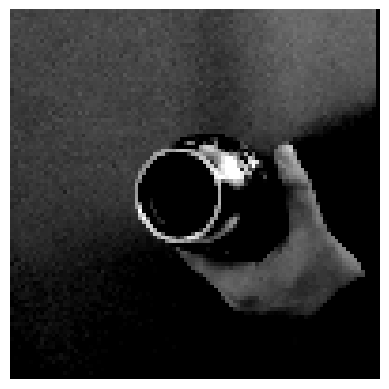

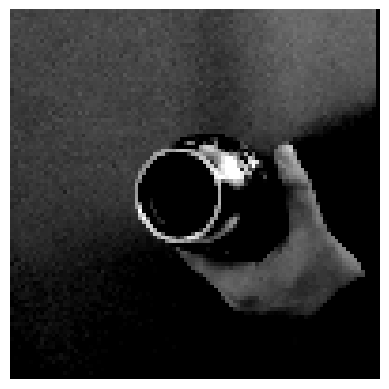

In [112]:
for vals in [dec_img, image_data_one_dimension]:
    image = get_image(vals)
    plt.imshow(image, cmap='gray', vmin=0, vmax=np.max(image))
    plt.axis('off')
    plt.show()

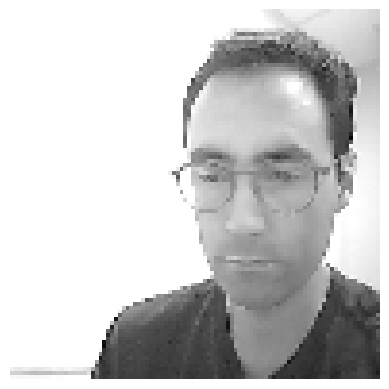

In [45]:

try:
    hex_string = input("Enter the image hex (max size 96x96):")
    hex_string_values = hex_string.split(",")[:96*96]
    hex_values = list(map(lambda hex_string: int(hex_string.strip(), 16), hex_string_values))
    image = get_image(hex_values)
    plt.imshow(image, cmap='gray', vmin=0, vmax=np.max(image))
    plt.axis('off')
    plt.show()
except Exception as e:
    image = None
    print(e)

In [28]:
if image is not None:
    user_images = len([img for img in os.listdir(images_path) if img.startswith("user")])
    output_file_path = os.path.join(images_path, f"user{user_images}")
    image_uint8 = image.astype(np.uint8)
    flattened_image_data = image_uint8.flatten()
    print(flattened_image_data.size)
    image_bytes = flattened_image_data.tobytes()

    with open(output_file_path, 'wb') as file:
        file.write(image_bytes)

9216
